<a href="https://www.kaggle.com/code/pavankumar20/diamond-complete-analysis-98-3?scriptVersionId=98118581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


<h1 style='background:#9AB0BD; border:4; border-radius: 30px;height:60px; font-size:250%; font-weight: bold; color:black'><center>Diamond Price Prediction🔷</center></h1> 

<img src=https://giffiles.alphacoders.com/143/14386.gif>


# Importing Libraries🕐

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Data Analysis🕑

In [4]:
df=pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<div style="border-radius:10px;
            border : blue;
            background-color: #9AB0BD;
            font-size:120%;
            text-align: left">

<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center>Data Description💫</center></h2>  
    
* price price in US dollars (326--$18,823)
* carat weight of the diamond (0.2--5.01)
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color diamond colour, from J (worst) to D (best)
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x length in mm (0--10.74)
* y width in mm (0--58.9)
* z depth in mm (0--31.8)
* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table width of top of diamond relative to widest point (43--95)

* depth is a function of x,y,z

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* Here x,y,z have min values as 0. we can eliminate those rows(refer to outliers)

In [8]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Categorical Analysis🕒

In [9]:
def cat_columns_plot(df,target,plot_type):
    cat_columns=df.select_dtypes([bool,'object','category']).columns
    n_cols=3
    n_rows=len(cat_columns)//n_cols
    q=(n_rows*n_cols)%len(cat_columns)
    if plot_type =='count_plot':
        fig,ax=plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(16,8))
        [sns.countplot(data=df, x=cat, ax=ax.flatten()[i]).set_xticklabels(ax.flatten()[i].get_xticklabels(),rotation = 30) for i,cat in enumerate(cat_columns)]
        while(q!=0):
            ax.flatten()[-q].set_visible(False)
            q=q-1
        plt.tight_layout()
        plt.show()
    elif plot_type =='comparison':
        fig,ax=plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(16,8))
        [sns.barplot(data=df,estimator=np.mean, x=cat,y=target, ax=ax.flatten()[i]).set_xticklabels(ax.flatten()[i].get_xticklabels(),rotation = 30) for i,cat in enumerate(cat_columns)]
        while(q!=0):
            ax.flatten()[-q].set_visible(False)
            q=q-1
        plt.tight_layout()
        plt.show()

> count plot for each category varible in dataset

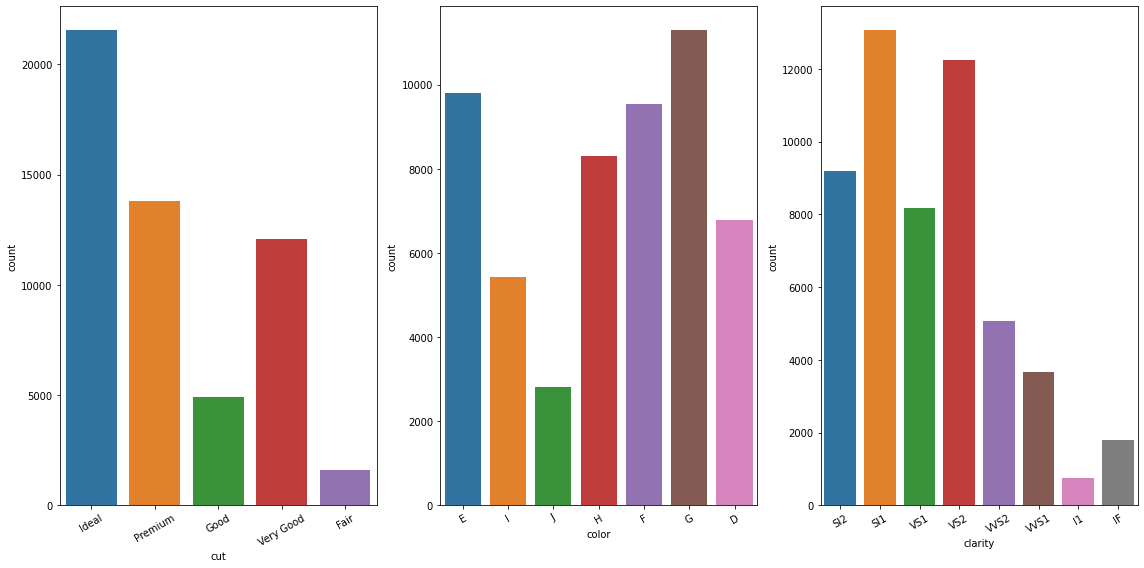

In [10]:
cat_columns_plot(df,'price','count_plot')

Observations:
* More number of diamonds are Ideal(quality of cut) and very few diamonds are fair
* G-color(median in colors from J(worst) to D(best)) diamonds are high in number, and J are less
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)), more number of diamonds are from clarity type(SI1)
* From all the above points, it is clear that there are very few worst diamonds in all the three attributes(Fair,J,I1)

> category variables vs price (average value of each category)

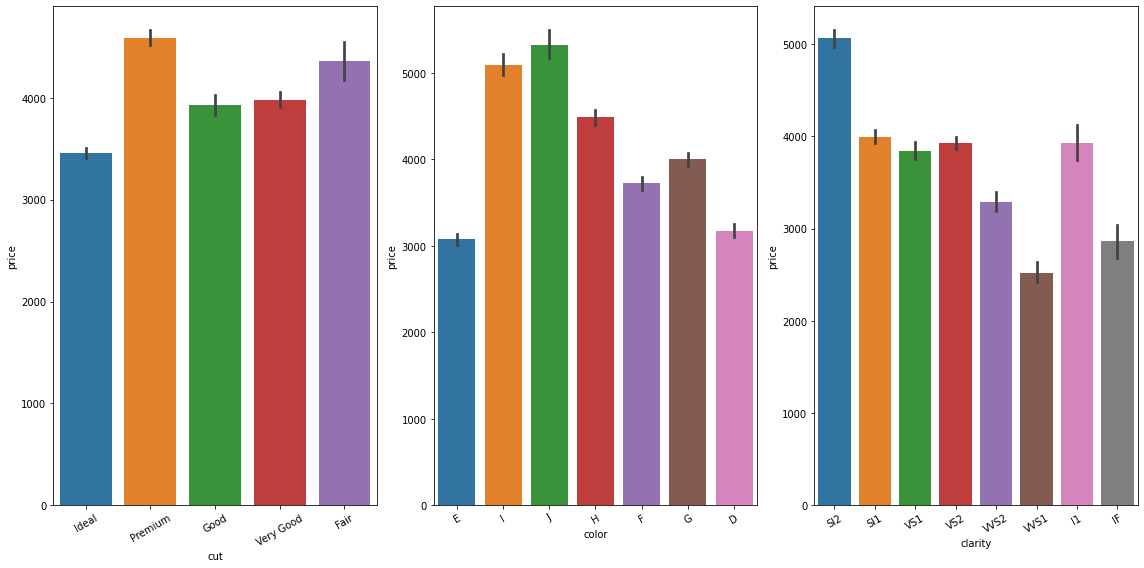

In [11]:
cat_columns_plot(df,'price','comparison')

Observations:
* It is the average value in each category,we can also change the estimator and compare(np.median,np.sum)
* Average value of 'Fair' diamond is comparitively higher(may be because of size)
* Eventhough, Fair and J categories are lower in number but higher in average value.

# Numerical Analysis🕓

In [12]:
#sns.pairplot(df.drop(['Unnamed: 0'],axis=1));

In [13]:
def num_columns_plot(df,target,plot_type):
    num_columns=df.select_dtypes([int,float]).columns
    n_cols=3
    n_rows=int(np.ceil(len(num_columns)/n_cols))
    q=(n_rows*n_cols)%len(num_columns)
    if plot_type =='distribution':
        fig,ax=plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(16,12))
        for i,num in enumerate(num_columns):
            sns.histplot(data=df, x=num,kde=True, ax=ax.flatten()[i])
        while(q!=0):
            ax.flatten()[-q].set_visible(False)
            q=q-1
        plt.tight_layout()
        plt.show()
    

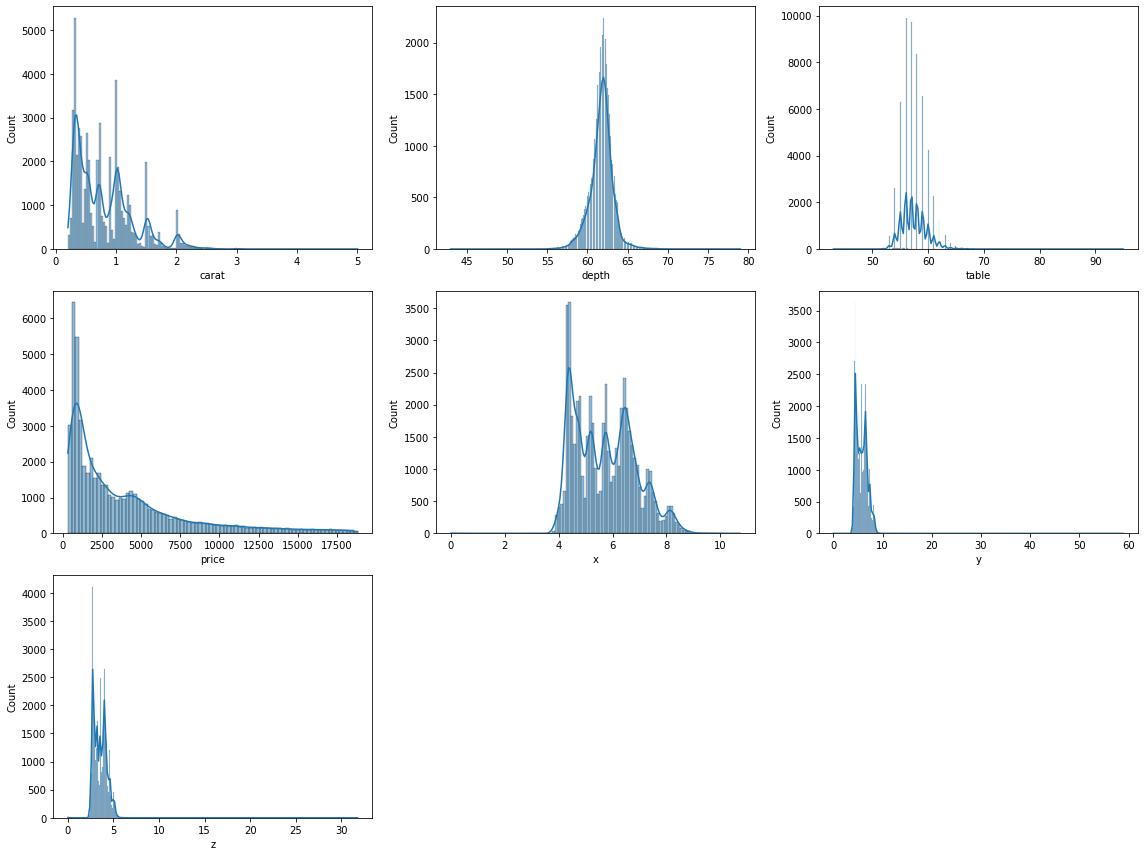

In [14]:
num_columns_plot(df.drop(['Unnamed: 0'],axis=1),'price','distribution')

Observations:
* Price(output variable is right skewed)
* As carat value increases, count decreases
* depth variables follows nearly perfect gaussian distribution

> Lets the observe relation between target and input variables

In [15]:
def num_reg_plot(df,target):
    num_columns=list(df.select_dtypes([int,float]).columns)
    num_columns.remove('price')
    for i,num in enumerate(num_columns):
        sns.lmplot(data=df,col='cut', x=num,y=target)
        plt.grid()
    plt.ylim([-100,25000])
    plt.tight_layout()
    plt.show()
    

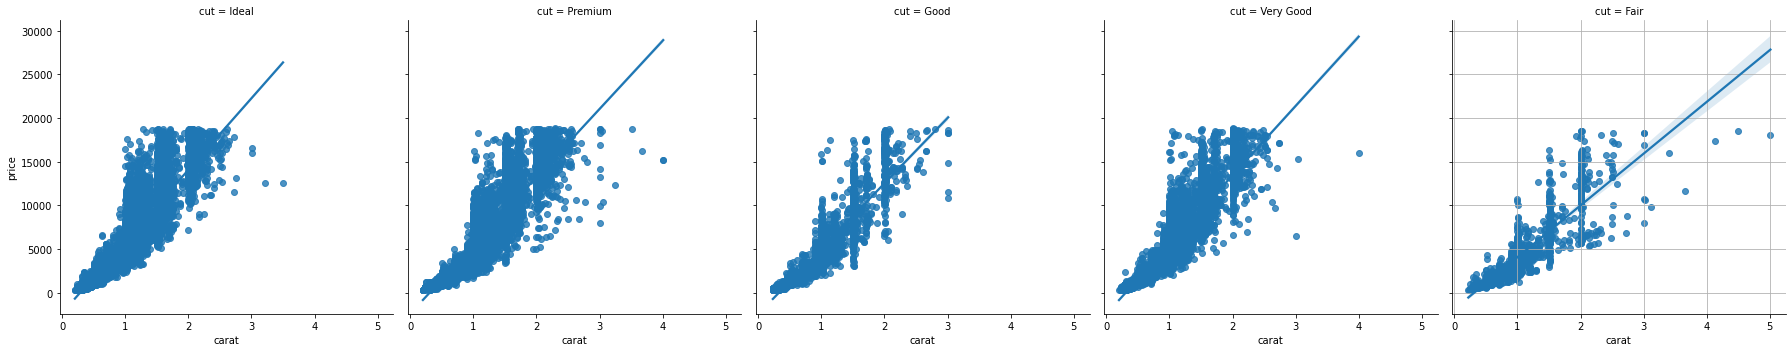

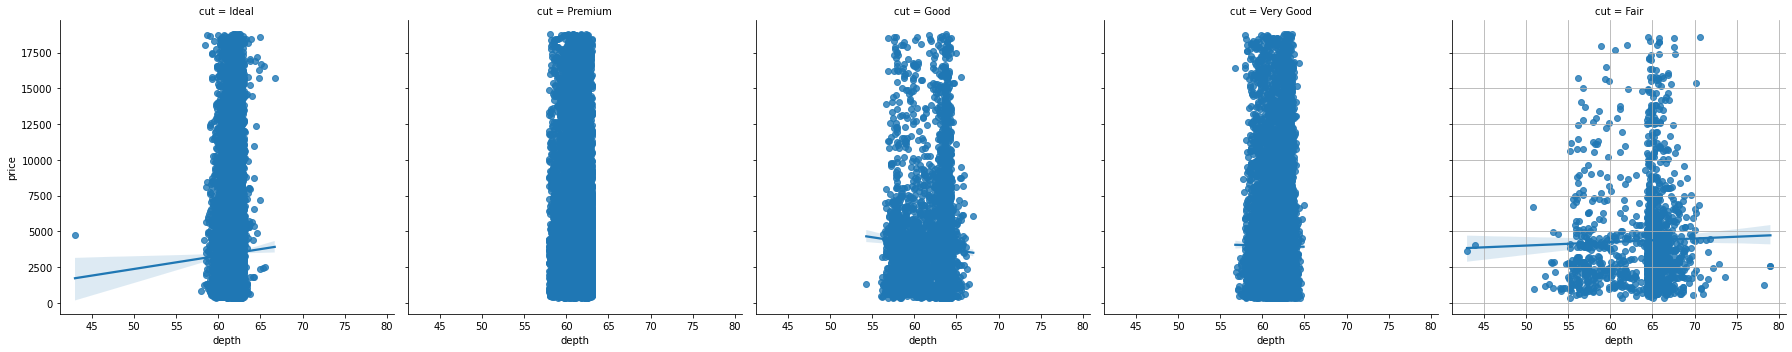

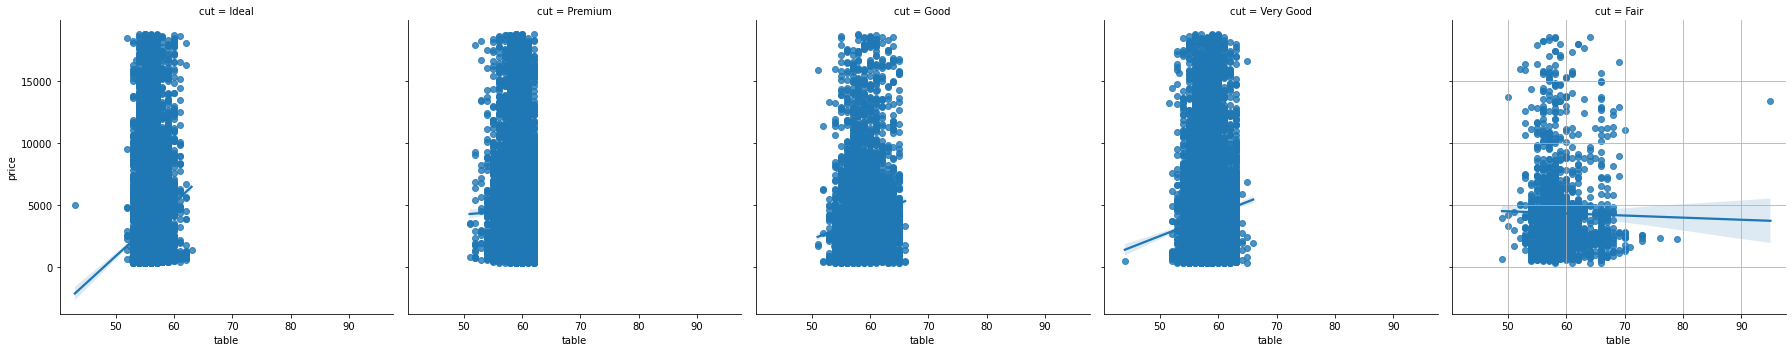

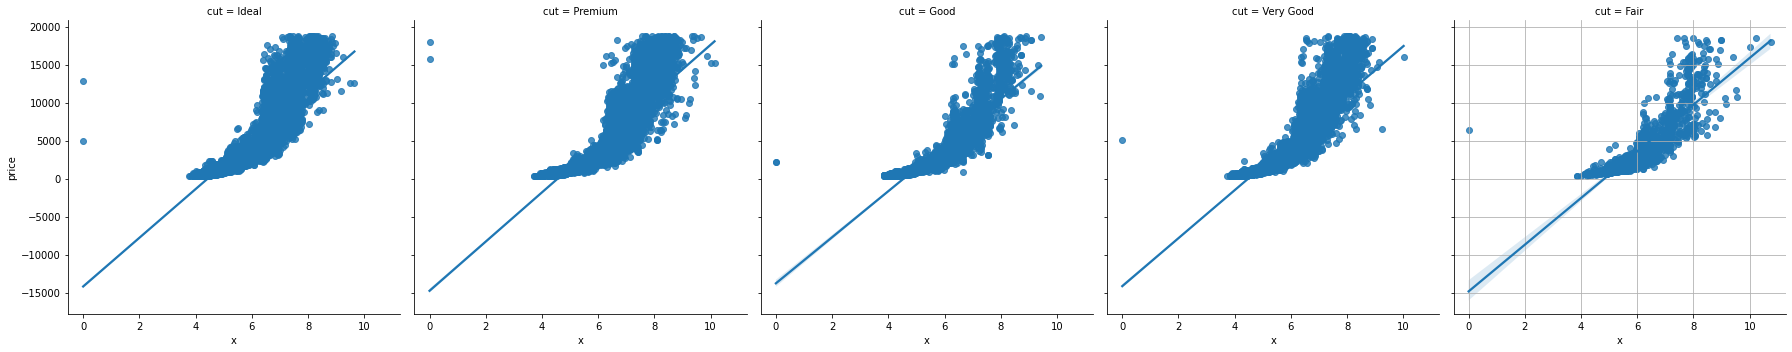

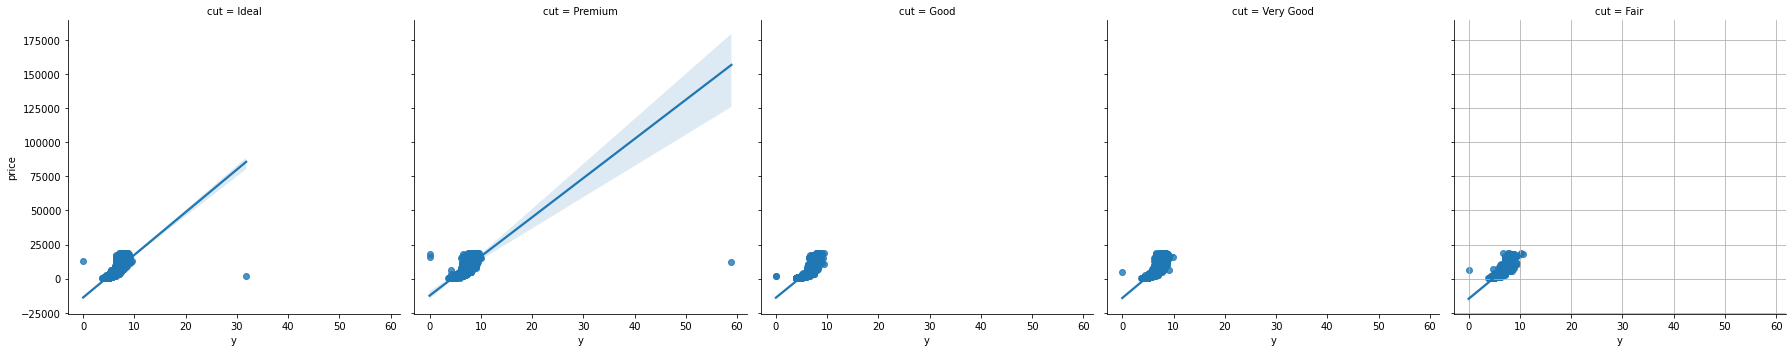

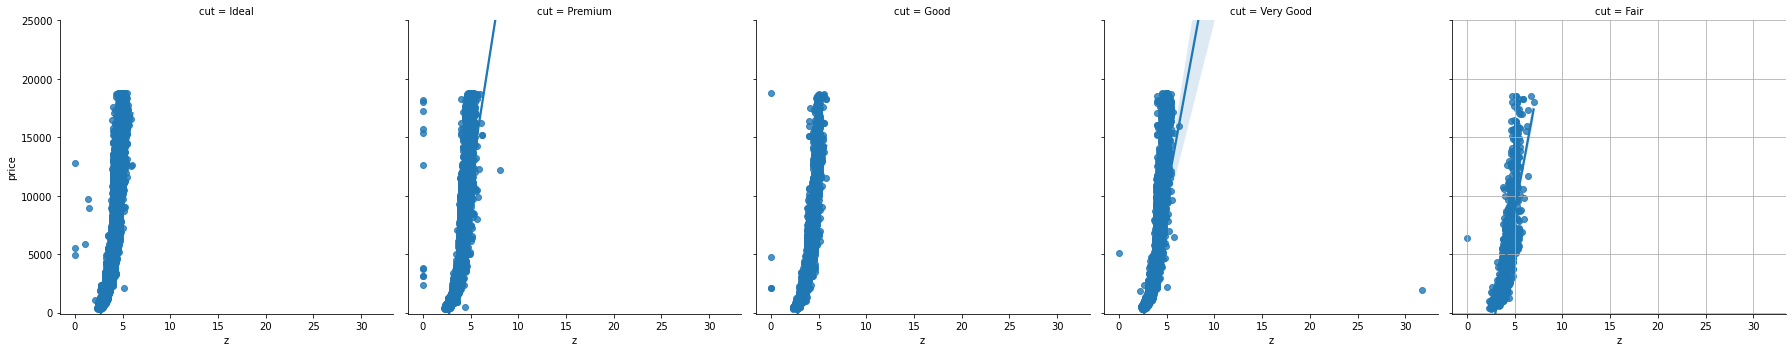

In [16]:
num_reg_plot(df.drop(['Unnamed: 0'],axis=1),'price')

Observations:
* hue value can be changed to any categorical variable
* Except depth and table variables(maybe these variables need a mediator variable), price is linearly correlated with all other variables.
* For a small change in value of z, high change in value in price

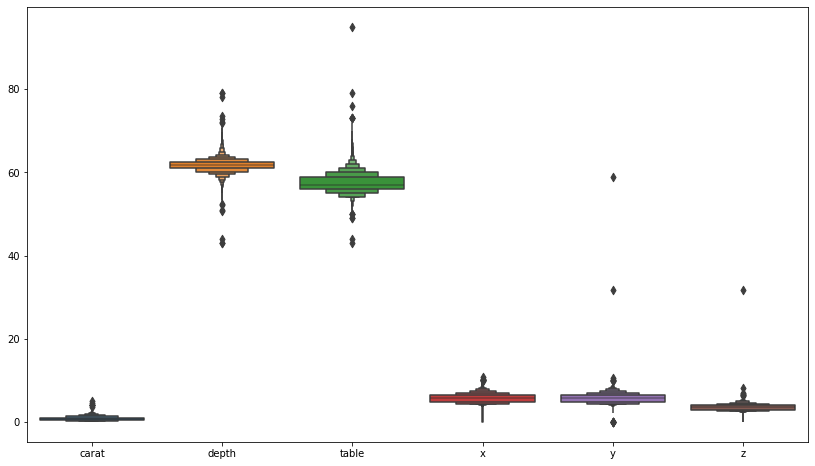

In [17]:
fig,ax=plt.subplots(figsize=(14,8))
sns.boxenplot(data=df.drop(['Unnamed: 0','price'],axis=1),ax=ax);

# Outliers🕔

* The data is big(53940 rows), so we can eliminate few extreme values or else we can also do without eliminating
* Let's save a copy of data without eliminating outliers

In [18]:
df2=df.copy()

In [19]:
def outliers(df,column,a,b):
    x=df[df[column].notna()][column]
    q1, q3 = np.percentile(x, [a, b])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    qq=np.where((x > upper_bound) | (x < lower_bound))[0]
    return qq

* Four inputs to function- data,numerical column,2 percentiles(extreme this range are considered as ouliers)

In [20]:
num_columns=df.select_dtypes([int,float])
for col in (num_columns.columns):
    out=outliers(df,col,5,95)
    df=df.drop(out)

In [21]:
df=df[df['x']!=0]
df=df[df['y']!=0]
df=df[df['z']!=0]

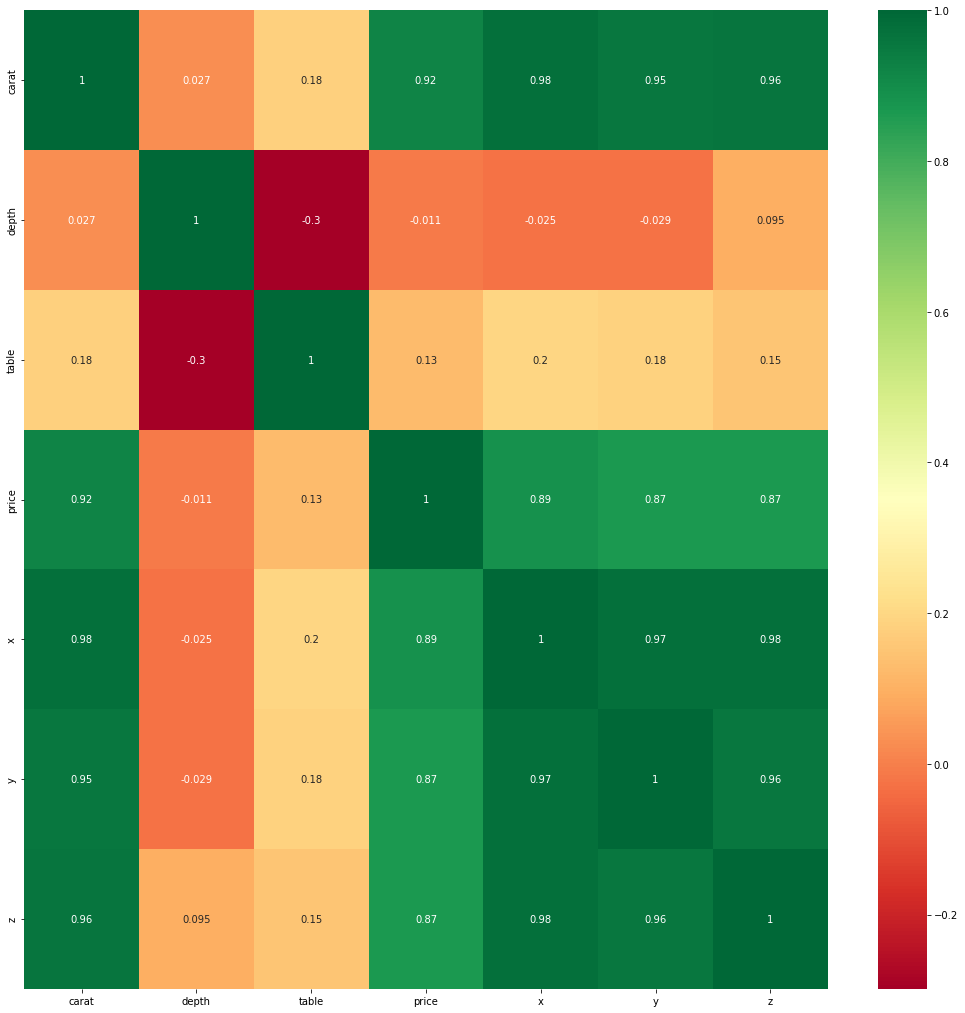

In [22]:
plt.figure(figsize = (18,18))
sns.heatmap(df.drop(['Unnamed: 0'],axis=1).corr(), annot = True, cmap = "RdYlGn")
plt.show()

* we can also create new feature as area or volume using x,y,z

# Data Preprocessing🕕

Based on data given in description:
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color diamond colour, from J (worst) to D (best)
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [23]:
df['cut']=df['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})
df['color']=df['color'].map({'J':6,'I':5,'H':4,'G':3,'F':2,'E':1,'D':0})
df['clarity']=df['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

* We could also use labelencoder or ordinalencoder but the order of values might not be same(here it treats 2>1)
* Or we could also use OneHotEncoder

In [24]:
X=df.drop(['Unnamed: 0','price'],axis=1)
y=df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state =8)

# Models🕖

* Regression task, so we can start from basic linear regression,Ridge, lasso,  decision tree, random forrest, XGBoost, MLPRegressor
* We need to scale data before applying to some models, which are sensitive to distance  like svm and also to neural network algorithms

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
!pip install -q --upgrade linear-tree
from lineartree import LinearBoostRegressor
from sklearn.model_selection import cross_val_score

In [26]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [27]:
models_with_scale={'linear Regression':LinearRegression(),'Lasso Regression':Lasso(),'Ridge':Ridge(),'MLP':MLPRegressor(hidden_layer_sizes=(64,32))}
models_without_scale={'RandomForestRegressor':RandomForestRegressor(n_estimators=200),'XGBRegressor':XGBRegressor(learning_rate=0.05,n_estimators=200),'LinearBoostRegressor':LinearBoostRegressor(base_estimator=LinearRegression(),n_estimators = 200,random_state = 42)}

In [28]:
for model_name,model in models_without_scale.items():
    scores=cross_val_score(model,x_train,y_train,cv=8,scoring='neg_root_mean_squared_error')
    score=(-1*scores).mean()
    print(f"{model_name}: {score}")
for model_name,model in models_with_scale.items():
    scores=cross_val_score(model,x_train_scaled,y_train,cv=8,scoring='neg_root_mean_squared_error')
    score=(-1*scores).mean()
    print(f"{model_name}: {score}")

RandomForestRegressor: 551.5769461053007
XGBRegressor: 532.1942685345381
LinearBoostRegressor: 601.6031402309048
linear Regression: 1205.7997213107833
Lasso Regression: 1203.7240170781843
Ridge: 1205.7960937374412
MLP: 740.1074928927079


# Parameter Tuning🕗

In [29]:
params={
    "n_estimators":[i for i in range(200,400,20)],
}

In [30]:
xgr=XGBRegressor(learning_rate=0.05)
grid=GridSearchCV(xgr,param_grid=params,cv=8,verbose=1,n_jobs=-1,scoring='neg_root_mean_squared_error')
grid_search=grid.fit(x_train,y_train)
print(grid_search.best_score_ )
best_params=grid_search.best_params_
print("best params:",best_params)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
-530.7959663737669
best params: {'n_estimators': 340}


In [31]:
model1=XGBRegressor(learning_rate=0.05,**best_params)
model1.fit(x_train,y_train)
pred=model1.predict(x_test)

# Final Result🕘

In [32]:
r2_score= metrics.r2_score(pred,y_test)
print('r2score:',r2_score)

r2score: 0.9832347412597298


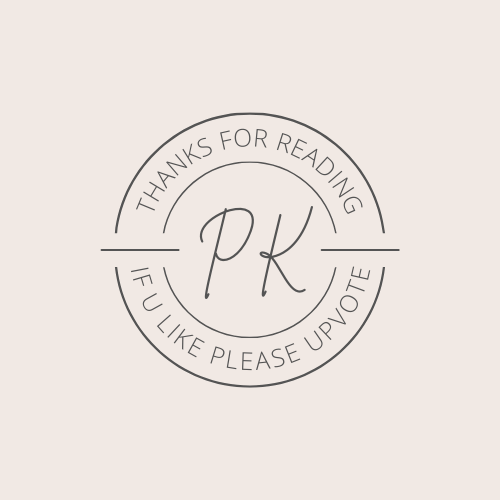